<a href="https://colab.research.google.com/github/pankajjadhav1505/ML-Project---Mobile_Price_Classification/blob/main/Mobile_Price_Classification_PJ%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Mobile Price Classification

**About Dataset**

**Context -**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is..

**Goal -**

The goal is to classify mobiles into one of four price ranges.

**Source of Dataset** -

The data is sourced from Kaggle, a popular platform for open-source datasets used in data science and machine learning projects.

**Source:**

Kaggle – Mobile Price Classification

Dataset Link - https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [ ]:
# Import libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
data = pd.read_csv('/content/train.csv')

In [ ]:
# Get first few rows of dataset.
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Get last few rows of dataset.
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Get dimensions of the dataset.
data.shape

(2000, 21)

In [ ]:
# Obtain statistical summary of dataset.
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Obtain column names of dataset.
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Data Cleaning  -**

In [ ]:
# Check Null values from dataset.
data.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
# Check duplicate data.
data.duplicated().sum()

np.int64(0)

In [ ]:
# Get unique values for each column.
data.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


**Data Visualization -**

In [ ]:
data['price_range'].unique()

array([1, 2, 3, 0])

<Axes: xlabel='price_range', ylabel='count'>

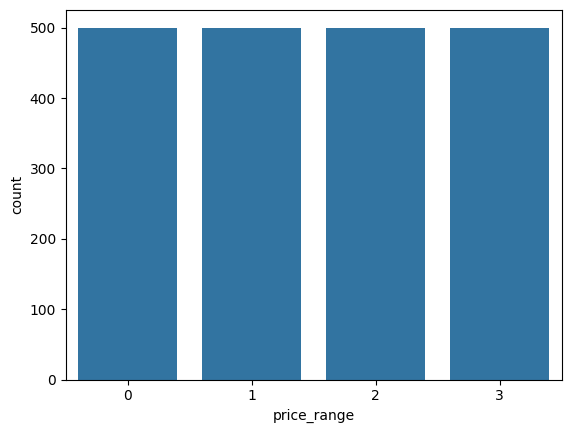

In [ ]:
sns.countplot(data, x='price_range')

In [ ]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

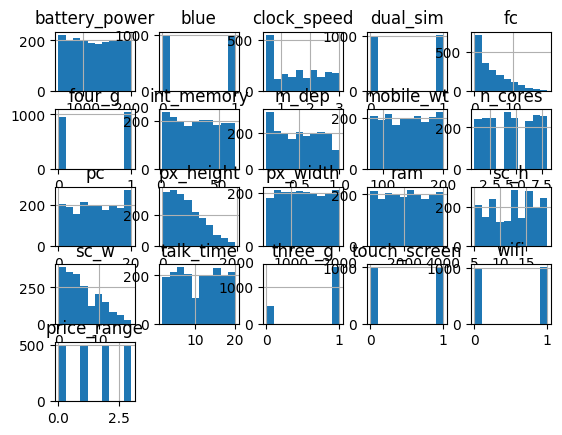

In [ ]:
data.hist()

**Correlation Matrix -**

In [ ]:
corr = data.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


**Correlation Heatmap -**

<Axes: >

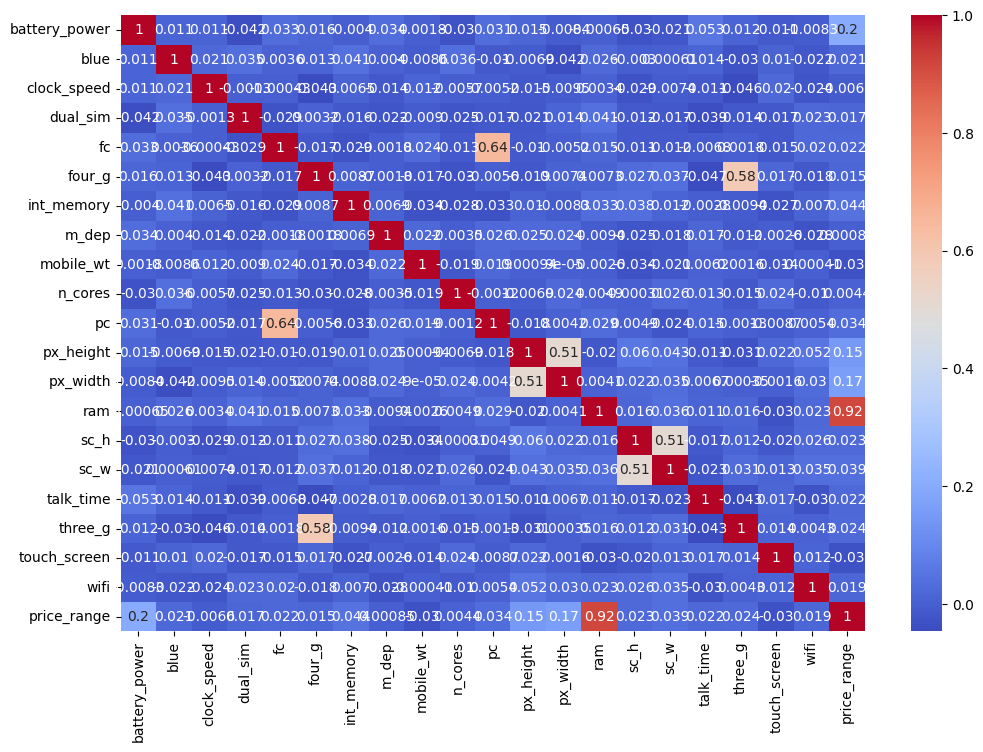

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Data Defination -**

In [ ]:
# Define the input features by dropping the target variable ('price_range') from the dataset.
x = data.drop('price_range', axis=1)

# Define the output variable, which is the target column ('price_range')
y = data['price_range']

**Data Slitting -**

Data splitting involves dividing the dataset into training and testing (80% & 20%) sets to evaluate how well a machine learning model performs on unseen data. This ensures the model learns patterns effectively while preventing overfitting and enabling reliable performance assessment.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

print('Shape x_train:', x_train.shape)  # Training input features
print('Shape x_test:', x_test.shape)    # Testing input features
print('Shape y_train:', y_train.shape)  # Training target labels
print('Shape y_test:', y_test.shape)    # Testing target labels

Shape x_train: (1400, 20)
Shape x_test: (600, 20)
Shape y_train: (1400,)
Shape y_test: (600,)


**Model Implementation -**

The goal of model implementation in this project is to classify mobile prices into different ranges based on features of a mobile phone(eg:- RAM,Internal Memory etc).

By applying classification algorithms, we aim to build a model that can accurately distinguish which price range fits for mobile phone.

**Classification Algorithms -**

1. Logistic Regression Classifier
2. KNN Classifier
3. Decision Tree Classifier
4. SVM Classifier
5. Random Forest Classifier
6. Gradeint Boosting Classifier
7. Adaboost Classifier
8. XGBoost Classifier
9. Naive Bayes Classifier

**Evaluation metrics -**

1. Precision
2. Recall
3. F1-score
4. Accuracy

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 1. Logistic Regression

# Import the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
log_reg_model = LogisticRegression()

# Train the Logistic Regression model on the training dataset
log_reg_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred_log_reg = log_reg_model.predict(x_test)

# Generate and display the performance evaluation.
log_reg_report = classification_report(y_test, y_pred_log_reg)
accuracy = accuracy_score(y_test, y_pred_log_reg)

print('Performance Evaluation - Logistic Regression:\n', log_reg_report)
print('Accuracy : ', accuracy)

Performance Evaluation - Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       150
           1       0.52      0.51      0.52       150
           2       0.44      0.42      0.43       150
           3       0.67      0.73      0.70       150

    accuracy                           0.62       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.62      0.62      0.62       600

Accuracy :  0.6183333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 2. KNN Classifier

# Importing the KNeighbors Classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Training the model using the training dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_knn = knn.predict(x_test)

# Generating and displaying performance evaluation
knn_report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

print('Model Performance - KNN Classifier:\n', knn_report)
print('Accuracy : ', accuracy)

Model Performance - KNN Classifier:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.93      0.93      0.93       150
           2       0.89      0.89      0.89       150
           3       0.94      0.93      0.93       150

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Accuracy :  0.9333333333333333


In [ ]:
# 3. Decision Tree Classifier

# Importing the Decision Tree Classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Training the model using the training dataset
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_dt = dt.predict(x_test)

# Generating and displaying performance evaluation
dt_report = classification_report(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)

print('Model Performance - Decision Tree Classifier:\n', dt_report)
print('Accuracy : ', accuracy)

Model Performance - Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       150
           1       0.79      0.75      0.77       150
           2       0.74      0.74      0.74       150
           3       0.84      0.89      0.86       150

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

Accuracy :  0.8166666666666667


In [ ]:
# 4. Random Forest Classifier

# Importing the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf = RandomForestClassifier()

# Training the model using the training dataset
rf.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_rf = rf.predict(x_test)

# Generating and displaying performance evaluation for the Random Forest model
random_forest_report = classification_report(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print('Model Performance - Random Forest Classifier:\n', random_forest_report)
print('Accuracy : ', accuracy)

Model Performance - Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       150
           1       0.81      0.85      0.83       150
           2       0.79      0.78      0.78       150
           3       0.93      0.91      0.92       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

Accuracy :  0.87


In [ ]:
# 5. Support Vector Classifier (SVC)

# Importing the Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Initializing the Support Vector Classifier (SVC) model
svm_model = SVC()

# Training the SVM model using the training dataset
svm_model.fit(x_train, y_train)

# Making predictions on the test dataset using the trained model
y_pred_svm = svm_model.predict(x_test)

# Generating and displaying performance evaluation for the SVC model
svm_report = classification_report(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)

print('Model Performance - Support Vector Classifier:\n', svm_report)
print('Accuracy : ', accuracy)

Model Performance - Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.94      0.97      0.96       150
           2       0.96      0.90      0.93       150
           3       0.95      0.97      0.96       150

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Accuracy :  0.96


In [ ]:
# 6. Gradient Boosting Classifier

# Importing the Gradient Boosting Classifier from the xgboost library
from sklearn.ensemble import GradientBoostingClassifier

# Training the model using the training dataset
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_gb = gb.predict(x_test)

# Generating and displaying performance evaluation
gb_report = classification_report(y_test, y_pred_gb)
accuracy = accuracy_score(y_test, y_pred_gb)

print('Performance Evaluation - Gradient Boosting Classifier:\n', gb_report)
print('Accuracy : ', accuracy)

Performance Evaluation - Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       150
           1       0.88      0.89      0.89       150
           2       0.86      0.86      0.86       150
           3       0.95      0.93      0.94       150

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

Accuracy :  0.9116666666666666


In [ ]:
# 7. AdaBoost Classifier

# Importing the AdaBoost model from scikit-learn
from sklearn.ensemble import AdaBoostClassifier

# Training the model with the training dataset
adb = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42)
adb.fit(x_train, y_train)

# Making predictions using the trained model on the test dataset
y_pred_adb = adb.predict(x_test)

# Generating and displaying performance evaluation
adb_report = classification_report(y_test, y_pred_adb)
accuracy = accuracy_score(y_test, y_pred_adb)

print('Performance Evaluation - AdaBoost Classifier:\n', adb_report)
print('Accuracy : ', accuracy)

Performance Evaluation - AdaBoost Classifier:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       150
           1       0.63      0.73      0.67       150
           2       0.68      0.48      0.56       150
           3       0.76      0.91      0.83       150

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.72       600
weighted avg       0.73      0.73      0.72       600

Accuracy :  0.73


In [ ]:
# 8. XGBoost Classifier

# Importing the XGBoost Classifier from the xgboost library
from xgboost import XGBClassifier

# Initializing the XGBoost model
xgb = XGBClassifier()

# Training the model using the training dataset
xgb.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_xgb = xgb.predict(x_test)

# Generating and displaying performance evaluation
xgb_report = classification_report(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)

print('Performance Evaluation - XGBoost Classifier:\n', xgb_report)
print('Accuracy : ', accuracy)

Performance Evaluation - XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.92      0.91      0.92       150
           2       0.88      0.89      0.88       150
           3       0.94      0.93      0.93       150

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Accuracy :  0.925


In [ ]:
# 9. Naive Bayes Classifier

# Importing the Gaussian Naive Bayes model from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Initializing the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Training the model with the training dataset
nb_model.fit(x_train, y_train)

# Making predictions using the trained model on the test dataset
y_pred_nb = nb_model.predict(x_test)

# Generating and displaying performance evaluation
nb_report = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)

print('Performance Evaluation - Naive Bayes Classifier:\n', nb_report)
print('Accuracy : ', accuracy)

Performance Evaluation - Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       150
           1       0.72      0.69      0.70       150
           2       0.66      0.69      0.67       150
           3       0.88      0.89      0.88       150

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

Accuracy :  0.7966666666666666


**Feature Importance –**

Feature importance helps identify which input variables have the greatest impact on the model’s predictions. By understanding which features contribute most, we can improve model performance, simplify the model, and gain valuable insights into the key factors driving customer behavior.

In [ ]:
# Extract and visualize feature importance for Classifier model -

**Feature Scaling for SVC -**

Support Vector Machines are sensitive to the scale of the input features. It's good practice to scale your data before training an SVM model to ensure all features contribute equally to the distance calculation. We'll use `StandardScaler` for this.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Retrain the SVC model with scaled data
svm_model_scaled = SVC(random_state=42) # Add random_state for reproducibility
svm_model_scaled.fit(x_train_scaled, y_train)

# Make predictions on the scaled test dataset
y_pred_svm_scaled = svm_model_scaled.predict(x_test_scaled)

# Generate and display performance evaluation for the scaled SVC model
svm_scaled_report = classification_report(y_test, y_pred_svm_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_svm_scaled)

print('Model Performance - Scaled Support Vector Classifier:\n', svm_scaled_report)
print('Accuracy (Scaled) : ', accuracy_scaled)

Model Performance - Scaled Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       150
           1       0.85      0.83      0.84       150
           2       0.77      0.83      0.79       150
           3       0.90      0.88      0.89       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

Accuracy (Scaled) :  0.8683333333333333


**Getting Feature Importance for SVC -**

**1. For Linear SVC (`kernel='linear'`)**


Top Features (Linear SVC - coef_ based):
          Feature  Importance
13            ram    4.486987
0   battery_power    1.110170
12       px_width    0.674927
11      px_height    0.652719
8       mobile_wt    0.207107
6      int_memory    0.106281
19           wifi    0.080440
5          four_g    0.070084
17        three_g    0.067300
14           sc_h    0.060721


/tmp/ipython-input-608568737.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df_linear.head(10), palette='viridis')


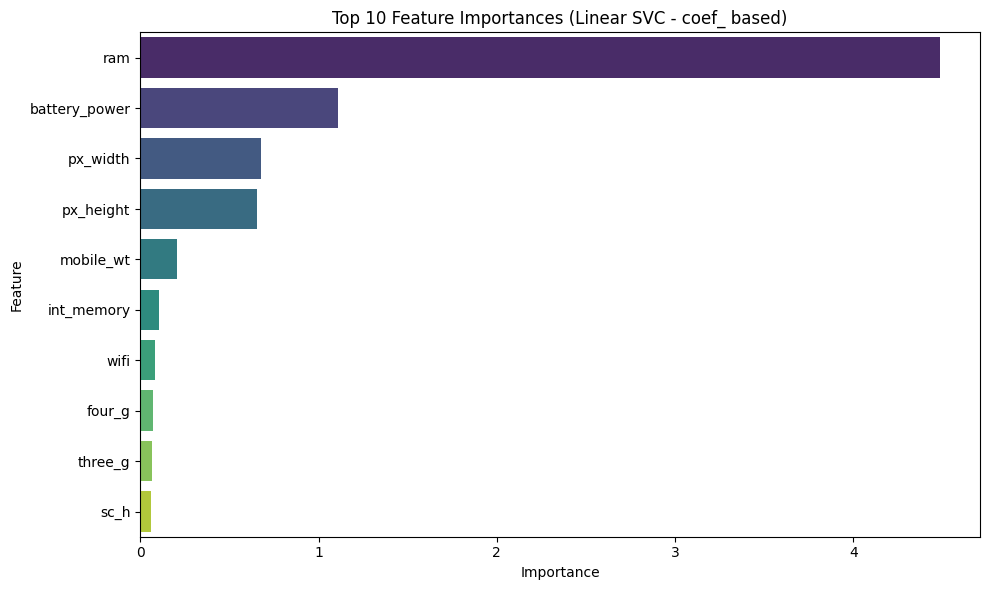

In [ ]:
from sklearn.svm import SVC

# Train a Linear SVC for demonstration of coef_
linear_svm_model = SVC(kernel='linear', random_state=42)
linear_svm_model.fit(x_train_scaled, y_train)

# Check if coef_ exists (it will for linear kernel)
if hasattr(linear_svm_model, 'coef_'):
    # For multi-class classification, coef_ is an array of shape (n_classes, n_features).
    # We can take the absolute mean across classes to get a single importance score per feature.
    feature_importance_linear = abs(linear_svm_model.coef_).mean(axis=0)

    fi_df_linear = pd.DataFrame({
        'Feature': x.columns,
        'Importance': feature_importance_linear
    }).sort_values(by='Importance', ascending=False)

    print("\nTop Features (Linear SVC - coef_ based):")
    print(fi_df_linear.head(10))

    # Create a visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=fi_df_linear.head(10), palette='viridis')
    plt.title('Top 10 Feature Importances (Linear SVC - coef_ based)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("The SVC model does not have a 'coef_' attribute (likely due to a non-linear kernel).")

**Conclusion & Implications for Bob's Company -**

This project successfully built and evaluated several models to predict mobile phone price ranges. The high accuracy achieved by models like **SVC**, KNN, and XGBoost suggests that these models could be reliably used by Bob's company. The key takeaway for Bob is that **RAM, battery power**, and **screen resolution (pixel dimensions)** are the primary drivers of mobile phone pricing.